MOVIE RATING PREDICTION

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [3]:
#Reading dataset
df = pd.read_csv("C:/Users/khush/Desktop/datasets/IMDb Movies India.csv",encoding='ISO-8859-1')

In [4]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


DATA CLEANING AND PROCESSING

In [6]:
#Cheacking null values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
#Removin null values
df.dropna(inplace=True)

In [8]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [9]:
df.shape

(5659, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [11]:
#Checking for duplicate values
df.duplicated().sum()

0

In [12]:
#Removing min word from Duration column and convert to int data type
df['Duration']=pd.to_numeric(df['Duration'].str.replace('min',''))

In [13]:
#Replacing brackets from Year column
df['Year']=df['Year'].str.replace(r'[()]','',regex=True).astype(int)

In [14]:
#Spliting the genre by ',' to keep only unique genres and replacing null values with mode
df['Genre']=df['Genre'].str.split(',')
df=df.explode('Genre')
df['Genre']=df['Genre'].fillna(df['Genre'].mode()[0])

In [15]:
#Converting Votes to int datatypes and removing ','
df['Votes']=pd.to_numeric(df['Votes'].str.replace(',',''))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 982.7+ KB


VISUALIZING DATA

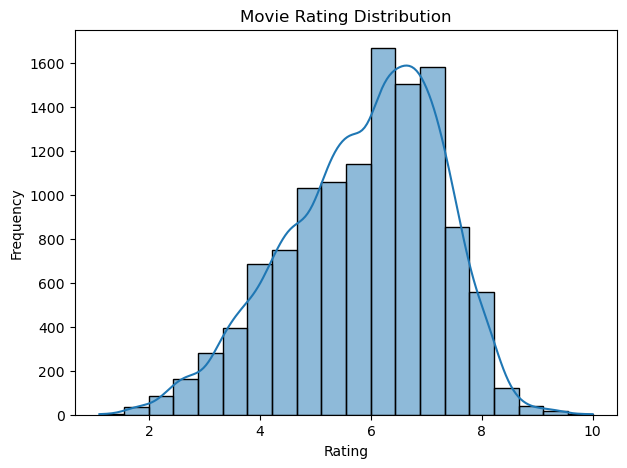

In [18]:
# Distribution of Ratings
plt.figure(figsize=(7, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Movie Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

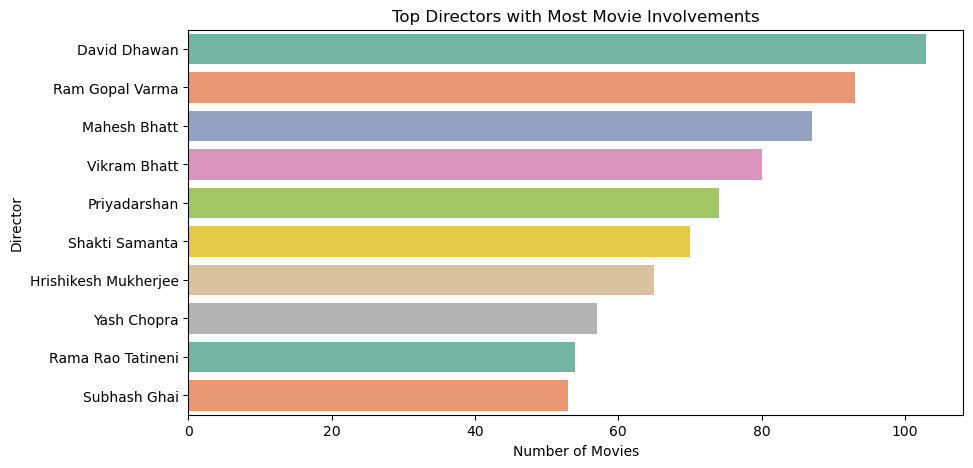

In [19]:
#Directors with most movie involvement
directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=directors.values, y=directors.index,hue=directors.index, palette='Set2',legend=False)
plt.title('Top Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

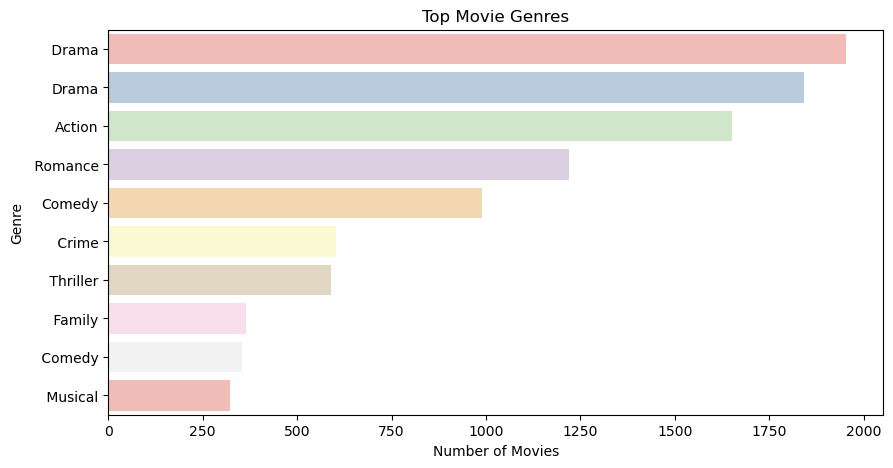

In [20]:
#Top movie genres
genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=genres.values, y=genres.index,hue=genres.index,  palette='Pastel1',legend=False)
plt.title('Top Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


Top 10 Actors by Number of Appearances:
Amitabh Bachchan      266
Akshay Kumar          213
Ashok Kumar           202
Dharmendra            195
Jeetendra             190
Ajay Devgn            188
Mithun Chakraborty    186
Rajesh Khanna         178
Shashi Kapoor         167
Sanjay Dutt           160
Name: count, dtype: int64


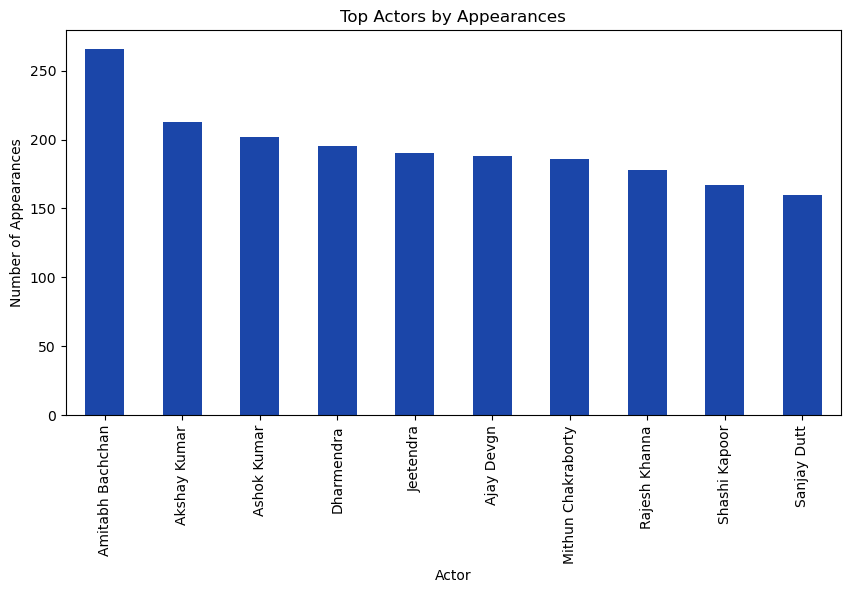

In [24]:
#Actors appearing most
topActors = df['Actor 1'].str.split(', ', expand=True).stack().value_counts().head(10)
print("\nTop 10 Actors by Number of Appearances:")
print(topActors)

plt.figure(figsize=(10, 5))
topActors.plot(kind='bar', color='#1b46a9')
plt.title('Top Actors by Appearances')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.show()

MODEL BUILDING

In [26]:
#Grouping columns
genreMeanRating = df.groupby('Genre')['Rating'].transform('mean')
df['genreMeanRating']=genreMeanRating
directorMeanRating = df.groupby('Director')['Rating'].transform('mean')
df['directorMeanRating']=directorMeanRating
actor1MeanRating = df.groupby('Actor 1')['Rating'].transform('mean')
df['actor1MeanRating']=actor1MeanRating
actor2MeanRating = df.groupby('Actor 2')['Rating'].transform('mean')
df['actor2MeanRating']=actor2MeanRating
actor3MeanRating = df.groupby('Actor 3')['Rating'].transform('mean')
df['actor3MeanRating']=actor3MeanRating

In [28]:
#Setting predictor and target variables
x=df[['Year','Votes','Duration','genreMeanRating','directorMeanRating','actor1MeanRating','actor2MeanRating','actor3MeanRating']]
y=df['Rating']

In [30]:
#Splitting dataset
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [32]:
#Building and training machine learning model
model=LinearRegression()
model.fit(x_train,y_train)
modelPredict=model.predict(x_test)

In [34]:
print('The performance evalution is given below:')
print('Mean squared error:',mean_squared_error(y_test,modelPredict))
print('Mean absolute error:',mean_absolute_error(y_test,modelPredict))
print('R2 score:',r2_score(y_test,modelPredict))

The performance evalution is given below:
Mean squared error: 0.4599059185255519
Mean absolute error: 0.5012270116223413
R2 score: 0.7603494046708594


MODEL TESTING

In [37]:
x.head(10)

,Year,Votes,Duration,genreMeanRating,directorMeanRating,actor1MeanRating,actor2MeanRating,actor3MeanRating
1,2019,8,109,6.248697,7.000000,6.850000,7.000000,7.000000
3,2019,35,110,5.838423,4.400000,5.250000,4.400000,4.460000
3,2019,35,110,5.838739,4.400000,5.250000,4.400000,4.460000
5,1997,827,147,5.838423,5.335135,4.793617,5.730000,5.930000
5,1997,827,147,5.875793,5.335135,4.793617,5.730000,5.930000
5,1997,827,147,6.289130,5.335135,4.793617,5.730000,5.930000
6,2005,1086,142,6.248697,7.407143,5.456863,6.828571,6.671429
6,2005,1086,142,5.838739,7.407143,5.456863,6.828571,6.671429
6,2005,1086,142,6.146667,7.407143,5.456863,6.828571,6.671429
8,2012,326,82,4.687500,5.600000,5.600000,5.812500,5.600000


In [39]:
y.head(10)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
5    4.7
6    7.4
6    7.4
6    7.4
8    5.6
Name: Rating, dtype: float64

In [62]:
#Creating test data
testData={'Year':[1997],'Votes':[815],'Duration':[140],'genreMeanRating':[6.1],'directorMeanRating':[5.4],'actor1MeanRating':[4.9],'actor2MeanRating':[5.9],'actor3MeanRating':[6.1]}
test=pd.DataFrame(testData)

In [43]:
#Predicting movie rating
predictedRating=model.predict(test)
print("Predicted Rating: ",predictedRating[0])

Predicted Rating:  5.547327140396888
